In [7]:
!git clone --single-branch --branch chore/openpose https://github.com/ennnas/FocusOnTheRoad.git
%cd FocusOnTheRoad/

/content/FocusOnTheRoad


In [3]:
!curl 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5048/868335/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1588266096&Signature=sxHwDyxrphC7bO1GZFNod439SDiJuCsNeea3ceYBpe3IWIVJ9zv7JRESGlvF6K2MMzyXtOG04s4trEnMLr%2FlzZIWTU2injtqCabMQx6eSLZG6fNvVNe7pvG0NuOZWdzuQ%2FIEjABTiOdKmbnz6TgdAetrYAt7KYFMuL3K6D%2FHEY9VbxgC6qxJh9PQnx2ZoAVsCgLjOrkJT28KS9ALcl6d%2FZ%2F%2FND6KXvZ9st0tcLp7EqcVcey0wPBnKQkaCTfdPSJW9iMLX0m%2FLQeGs9paXtZIxKPN9ch8d1TirTB%2FMylNNpozZIQ2iwN2OtXRu3lPB4Ggmi3ESxSYsW9b7c9oBp%2F%2FUg%3D%3D&response-content-disposition=attachment%3B+filename%3Dstate-farm-distracted-driver-detection.zip' \
  -H 'authority: storage.googleapis.com' \
  -H 'upgrade-insecure-requests: 1' \
  -H 'user-agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.113 Safari/537.36' \
  -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9' \
  -H 'sec-fetch-site: cross-site' \
  -H 'sec-fetch-mode: navigate' \
  -H 'sec-fetch-user: ?1' \
  -H 'sec-fetch-dest: document' \
  -H 'referer: https://www.kaggle.com/' \
  -H 'accept-language: it-IT,it;q=0.9,en-US;q=0.8,en;q=0.7,la;q=0.6' \
  --compressed \
  -o data.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4097M  100 4097M    0     0  55.7M      0  0:01:13  0:01:13 --:--:-- 32.0M


In [4]:
!unzip data.zip -d data/

Streaming output truncated to the last 5000 lines.
  inflating: data/imgs/train/c7/img_56661.jpg  
  inflating: data/imgs/train/c7/img_56699.jpg  
  inflating: data/imgs/train/c7/img_56717.jpg  
  inflating: data/imgs/train/c7/img_56724.jpg  
  inflating: data/imgs/train/c7/img_56768.jpg  
  inflating: data/imgs/train/c7/img_56779.jpg  
  inflating: data/imgs/train/c7/img_56849.jpg  
  inflating: data/imgs/train/c7/img_56899.jpg  
  inflating: data/imgs/train/c7/img_56938.jpg  
  inflating: data/imgs/train/c7/img_5706.jpg  
  inflating: data/imgs/train/c7/img_57076.jpg  
  inflating: data/imgs/train/c7/img_57122.jpg  
  inflating: data/imgs/train/c7/img_57137.jpg  
  inflating: data/imgs/train/c7/img_5715.jpg  
  inflating: data/imgs/train/c7/img_57278.jpg  
  inflating: data/imgs/train/c7/img_57321.jpg  
  inflating: data/imgs/train/c7/img_57345.jpg  
  inflating: data/imgs/train/c7/img_57355.jpg  
  inflating: data/imgs/train/c7/img_5741.jpg  
  inflating: data/imgs/train/c7/img_5743

In [7]:
!wget https://www.dropbox.com/sh/7xbup2qsn7vvjxo/AABaYNMvvNVFRWqyDXl7KQUxa/body_pose_model.pth -P /content/FocusOnTheRoad/checkpoints

--2020-04-27 17:08:42--  https://www.dropbox.com/sh/7xbup2qsn7vvjxo/AABaYNMvvNVFRWqyDXl7KQUxa/body_pose_model.pth
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/7xbup2qsn7vvjxo/AABaYNMvvNVFRWqyDXl7KQUxa/body_pose_model.pth [following]
--2020-04-27 17:08:43--  https://www.dropbox.com/sh/raw/7xbup2qsn7vvjxo/AABaYNMvvNVFRWqyDXl7KQUxa/body_pose_model.pth
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca965beb7934074e39f79d3d481.dl.dropboxusercontent.com/cd/0/inline/A2qCrDf5pKTUxXMn7I-eyOoyxbVW6JxYF5QoWiS8cL-njyw2R7U12Es0rSUImTg-aSDXiDQVib9S-f3RFIHe6vo7G-lEq-5Ze3yHf-22PeUtgw/file# [following]
--2020-04-27 17:08:43--  https://uca965beb7934074e39f79d3d481.dl.dropboxusercontent.com/cd/0/inline/A2qCrDf5pKTUxXMn7I-eyOoyxbVW6JxYF

In [6]:
!pip install tqdm
!pip install catboost

     |████████████████████████████████| 64.8MB 47kB/s 


In [0]:
from __future__ import print_function, division
from collections import OrderedDict
from typing import Any, List, Sequence, Tuple

import os
from pathlib import Path
from tqdm.notebook import tqdm

from catboost import CatBoostClassifier, Pool
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, log_loss
from skimage import io, transform


import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision.models import vgg19_bn
from torch.utils.data import Dataset

%matplotlib inline

DATA_DIR = 'data/'
TEST_DIR = DATA_DIR + "imgs/test"
DRIVERS = ['p002', 'p012', 'p014', 'p015', 'p016', 'p021', 'p022', 'p024',
       'p026', 'p035', 'p039', 'p041', 'p042', 'p045', 'p047', 'p049',
       'p050', 'p051', 'p052', 'p056', 'p061', 'p064', 'p066', 'p072',
       'p075', 'p081']

CLASSES = {
    0: 'safe driving',
    1: 'texting - right',
    2: 'talking on the phone - right',
    3: 'texting - left',
    4: 'talking on the phone - left',
    5: 'operating the radio',
    6: 'drinking',
    7: 'reaching behind',
    8: 'hair and makeup',
    9: 'talking to passenger'
}

test_files = os.listdir(TEST_DIR)

In [0]:
def get_probability_df(y_prob, y_true):
    if not isinstance(y_prob, torch.Tensor):
        y_prob = torch.Tensor(y_prob)
    correct_class_prob = torch.gather(y_prob, 1, torch.Tensor(y_true).long().view(-1, 1))
    correct_class_df = pd.DataFrame([*correct_class_prob.numpy()], columns=['probability'])
    correct_class_df['class'] = y_true
    return correct_class_df

def multi_class_log_loss(outputs: torch.Tensor, labels: torch.Tensor) -> torch.Tensor:
    """
    Multi-class log loss as defined in the kaggle competition
    https://www.kaggle.com/c/state-farm-distracted-driver-detection/overview/evaluation

    :param outputs: torch tensor containing the model predictions
    :param labels: torch tensor containing the truth labels

    :return: the loss score
    """
    loss = -torch.mean(torch.log(torch.gather(outputs, 1, labels.view(-1, 1))))

    return loss

criterion = multi_class_log_loss

# Read data

In [0]:
from dataset.model_selection import train_test_split

def get_dataframes(train_size: int = 600, val_size: int = 100) -> Sequence[pd.DataFrame]:
    """ Read the data and split images into train, validation and test sets
    :param train_size: The number of images per class to use for training
    :param val_size: The number of images per class to use for validation

    :return: the train, validation and test dataframes"""
    # read the drivers list from the csv
    df = pd.read_csv(DATA_DIR + "driver_imgs_list.csv")

    # compose the filepath and extract the label from the classname cX
    df["filepath"] = DATA_DIR + "imgs/train/" + df["classname"] + "/" + df["img"]
    df["label"] = df.classname.str[-1].astype(int)
    df["classname"] = df.label.map(CLASSES)

    # extract the training and validation set and use the remaining for testing
    train_df, val_df = train_test_split(
        df, train_size + val_size, val_size, group_ids=["classname"]
    )
    test_df = pd.concat([df, train_df, val_df]).drop_duplicates(keep=False)
    return train_df.reset_index(drop=True), val_df.reset_index(drop=True), test_df.reset_index(drop=True)

In [11]:
train_df, val_df, test_df = get_dataframes(500, 500)
print(train_df.shape, val_df.shape, test_df.shape)
train_df.head()

(5000, 5) (5000, 5) (12424, 5)


,subject,classname,img,filepath,label
0,p022,drinking,img_24492.jpg,data/imgs/train/c6/img_24492.jpg,6
1,p051,drinking,img_18234.jpg,data/imgs/train/c6/img_18234.jpg,6
2,p002,drinking,img_80795.jpg,data/imgs/train/c6/img_80795.jpg,6
3,p061,drinking,img_65210.jpg,data/imgs/train/c6/img_65210.jpg,6
4,p045,drinking,img_47743.jpg,data/imgs/train/c6/img_47743.jpg,6


# Human Pose Estimation

## Create Dataset

In [0]:
from dataset.dataset import OpenPoseDataset
from dataset.load_statefarm import get_openpose_dataloader
openpose_trainloader = get_openpose_dataloader(train_df)
openpose_valloader = get_openpose_dataloader(val_df)
openpose_testloader = get_openpose_dataloader(test_df)

## Model - OpenPose

In [16]:
from models.bodypose import BodyPose
bodypose = BodyPose()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
bodypose.to(device)

BodyPose(
  (model0): Sequential(
    (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv1_1): ReLU(inplace=True)
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv1_2): ReLU(inplace=True)
    (pool1_stage1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv2_1): ReLU(inplace=True)
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv2_2): ReLU(inplace=True)
    (pool2_stage1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv3_1): ReLU(inplace=True)
    (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv3_2): ReLU(inplace=True)
    (conv3_3): Conv2d(256, 256, kernel_size=(3, 3)

## Show an example

In [0]:
filepath = DATA_DIR + 'imgs/train/c6/img_1705.jpg'

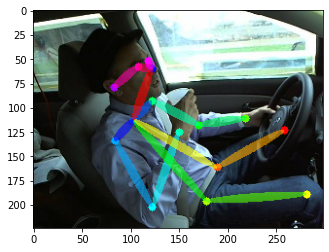

In [19]:
from models.visualize import parse_img, draw_bodypose

oriImg = cv2.imread(filepath)
oriImg = cv2.resize(oriImg, (298, 224))
candidate, subset, all_peaks = parse_img(bodypose, oriImg)

canvas = draw_bodypose(oriImg, candidate, subset)
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.show()

## Extract Keypoints

In [20]:
from models.trainer import extract_keypoints
train_X = extract_keypoints(bodypose, openpose_trainloader, device=device)
val_X = extract_keypoints(bodypose, openpose_valloader, device=device)
test_X = extract_keypoints(bodypose, openpose_testloader, device=device)

In [21]:
train_X.head()

,x_0,y_0,score_0,x_1,y_1,score_1,x_2,y_2,score_2,x_3,y_3,score_3,x_4,y_4,score_4,x_5,y_5,score_5,x_6,y_6,score_6,x_7,y_7,score_7,x_8,y_8,score_8,x_9,y_9,score_9,x_10,y_10,score_10,x_11,y_11,score_11,x_12,y_12,score_12,x_13,y_13,score_13,x_14,y_14,score_14,x_15,y_15,score_15,x_16,y_16,score_16,x_17,y_17,score_17,label,filepath
0,123.0,64.0,0.960927,110,118,0.852273,93.0,139.0,0.786710,126.0,223.0,0.690497,181.0,188.0,0.881194,124,97,0.816330,176.0,112.0,0.846224,215.0,68.0,0.793692,178.0,212.0,0.277365,275.0,188.0,0.516579,NaN,NaN,NaN,195.0,191.0,0.364299,242.0,142.0,0.223659,NaN,NaN,NaN,111.0,61.0,0.969197,114.0,55.0,0.156014,90.0,78.0,0.724895,NaN,NaN,NaN,1,data/imgs/train/c1/img_49212.jpg
1,135.0,56.0,0.899496,111,111,0.780031,99.0,123.0,0.743623,166.0,138.0,0.712946,260.0,100.0,0.760710,124,96,0.536113,11.0,138.0,0.314377,0.0,130.0,0.152634,169.0,197.0,0.512061,273.0,206.0,0.567777,NaN,NaN,NaN,179.0,170.0,0.392041,232.0,146.0,0.241005,246.0,152.0,0.198684,126.0,54.0,0.896184,NaN,NaN,NaN,103.0,72.0,0.910689,NaN,NaN,NaN,0,data/imgs/train/c0/img_93757.jpg
2,132.0,72.0,0.921127,118,110,0.803010,98.0,125.0,0.734167,130.0,190.0,0.855108,173.0,143.0,0.902191,139,93,0.788910,187.0,95.0,0.808788,235.0,79.0,0.838351,166.0,196.0,0.589276,252.0,180.0,0.708429,287.0,223.0,0.145577,180.0,166.0,0.532231,252.0,155.0,0.499385,NaN,NaN,NaN,122.0,69.0,0.885761,131.0,63.0,0.817973,102.0,78.0,0.798685,NaN,NaN,NaN,1,data/imgs/train/c1/img_55927.jpg
3,122.0,67.0,0.946223,100,122,0.835368,88.0,139.0,0.715692,160.0,200.0,0.827290,217.0,153.0,0.961897,113,104,0.753586,145.0,143.0,0.788085,171.0,118.0,0.862421,158.0,195.0,0.274426,264.0,190.0,0.538225,NaN,NaN,NaN,164.0,168.0,0.351698,207.0,142.0,0.203479,NaN,NaN,NaN,110.0,63.0,0.947522,118.0,59.0,0.228383,82.0,78.0,0.925339,NaN,NaN,NaN,3,data/imgs/train/c3/img_30491.jpg
4,151.0,37.0,0.857952,140,86,0.802667,116.0,111.0,0.777480,170.0,166.0,0.874130,157.0,103.0,0.829809,164,62,0.732973,222.0,49.0,0.728475,285.0,33.0,0.422032,187.0,182.0,0.414988,58.0,141.0,0.750535,110.0,197.0,0.258224,207.0,152.0,0.373187,73.0,128.0,0.302335,127.0,195.0,0.195613,138.0,35.0,0.884534,145.0,29.0,0.421381,112.0,54.0,0.810246,NaN,NaN,NaN,2,data/imgs/train/c2/img_25551.jpg


In [0]:
train_X.to_pickle(DATA_DIR + 'train_X.pkl.zip', compression='zip')
val_X.to_pickle(DATA_DIR + 'val_X.pkl.zip', compression='zip')
test_X.to_pickle(DATA_DIR + 'test_X.pkl.zip', compression='zip')

In [0]:
train_y = train_X['label'].tolist()
val_y = val_X['label'].tolist()
test_y = test_X['label'].tolist()

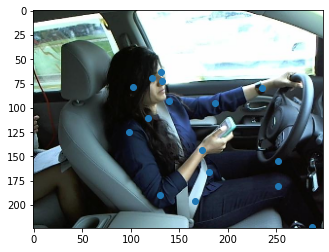

In [23]:
image_id = 2
filepath = train_X.loc[image_id]['filepath']
oriImg = cv2.imread(filepath)
oriImg = cv2.resize(oriImg, (298, 224))
plt.imshow(oriImg[:, :, [2, 1, 0]])
xs = train_X.iloc[image_id][[f'x_{i}' for i in range(18)]].tolist()
ys = train_X.iloc[image_id][[f'y_{i}' for i in range(18)]].tolist()
plt.scatter(xs, ys)
plt.show()

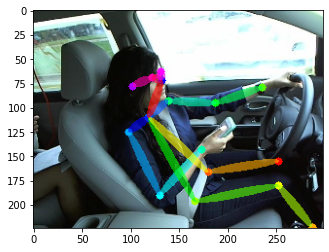

In [24]:
oriImg = cv2.resize(oriImg, (298, 224))
oriImg = cv2.imread(filepath)
oriImg = cv2.resize(oriImg, (298, 224))
candidate, subset, all_peaks = parse_img(bodypose, oriImg)

canvas = draw_bodypose(oriImg, candidate, subset)
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.show()

In [0]:
def normalize_df(df):
    x_cols_to_norm = [f"x_{i}" for i in range(18)]
    y_cols_to_norm = [f"y_{i}" for i in range(18)]
    df[x_cols_to_norm] = df[x_cols_to_norm].apply(lambda x: x / 224 )
    df[y_cols_to_norm] = df[y_cols_to_norm].apply(lambda x: x / 298 )
    return df

In [0]:
norm_X = normalize_df(train_X.copy(deep=True)).drop(columns=['label', 'filepath'])
norm_val_X = normalize_df(val_X.copy(deep=True)).drop(columns=['label', 'filepath'])
norm_test_X = normalize_df(test_X.copy(deep=True)).drop(columns=['label', 'filepath'])

# CatBoost

In [31]:
train_data = norm_X

train_labels = train_y

eval_data = norm_val_X

eval_labels = val_y

eval_dataset = Pool(eval_data,
                    eval_labels)

cb_model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.2,
                           depth=6,
                           min_data_in_leaf=5,
                           l2_leaf_reg=1,
                           use_best_model=True,
                           random_strength=2,
                           border_count=254,
                           loss_function='MultiClass',
                           custom_metric=['AUC'],
                           task_type="GPU",
                           devices='0:1')


cb_model.fit(train_data,
          train_labels,
          eval_set=eval_dataset,
          early_stopping_rounds=5,
          verbose=True,
          plot=True)

print(cb_model.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 2.0127727	test: 2.0109859	best: 2.0109859 (0)	total: 37.2ms	remaining: 37.2s
1:	learn: 1.7912133	test: 1.7900309	best: 1.7900309 (1)	total: 65.5ms	remaining: 32.7s
2:	learn: 1.6337962	test: 1.6324877	best: 1.6324877 (2)	total: 91.3ms	remaining: 30.3s
3:	learn: 1.5049701	test: 1.5074029	best: 1.5074029 (3)	total: 117ms	remaining: 29.1s
4:	learn: 1.4095051	test: 1.4120213	best: 1.4120213 (4)	total: 146ms	remaining: 29.1s
5:	learn: 1.3185690	test: 1.3213929	best: 1.3213929 (5)	total: 175ms	remaining: 29s
6:	learn: 1.2354064	test: 1.2388609	best: 1.2388609 (6)	total: 209ms	remaining: 29.6s
7:	learn: 1.1673258	test: 1.1718117	best: 1.1718117 (7)	total: 236ms	remaining: 29.2s
8:	learn: 1.1119503	test: 1.1162385	best: 1.1162385 (8)	total: 262ms	remaining: 28.9s
9:	learn: 1.0620820	test: 1.0682649	best: 1.0682649 (9)	total: 289ms	remaining: 28.6s
10:	learn: 1.0139957	test: 1.0223763	best: 1.0223763 (10)	total: 315ms	remaining: 28.3s
11:	learn: 0.9695412	test: 0.9801908	best: 0.980190

0.11858973969774787


[Text(0, 0.5, 'safe driving'),
 Text(0, 1.5, 'texting - right'),
 Text(0, 2.5, 'talking on the phone - right'),
 Text(0, 3.5, 'texting - left'),
 Text(0, 4.5, 'talking on the phone - left'),
 Text(0, 5.5, 'operating the radio'),
 Text(0, 6.5, 'drinking'),
 Text(0, 7.5, 'reaching behind'),
 Text(0, 8.5, 'hair and makeup'),
 Text(0, 9.5, 'talking to passenger')]

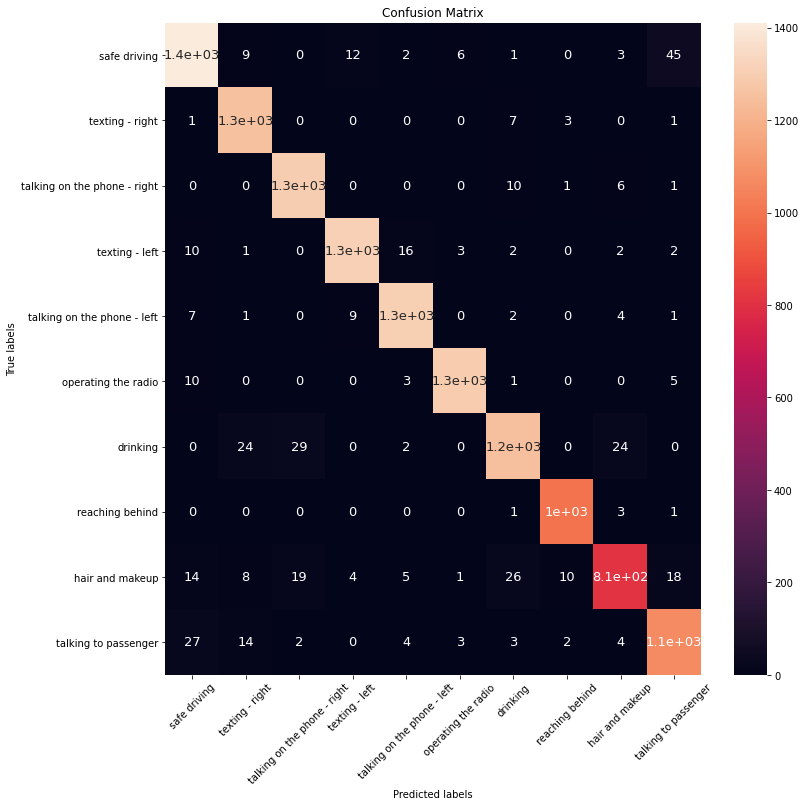

In [32]:
cb_test_preds = cb_model.predict_proba(norm_test_X)
print(log_loss(test_y, cb_test_preds))


test_y_pred = np.argmax(cb_test_preds,axis=1)
cm = confusion_matrix(test_y, test_y_pred)

plt.figure(figsize=(12,12))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size":13}); #annot=True to annotate cells

# labels, title and ticks
label_names = list(CLASSES.values())
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label_names, rotation=45)
ax.yaxis.set_ticklabels(label_names, rotation=0)

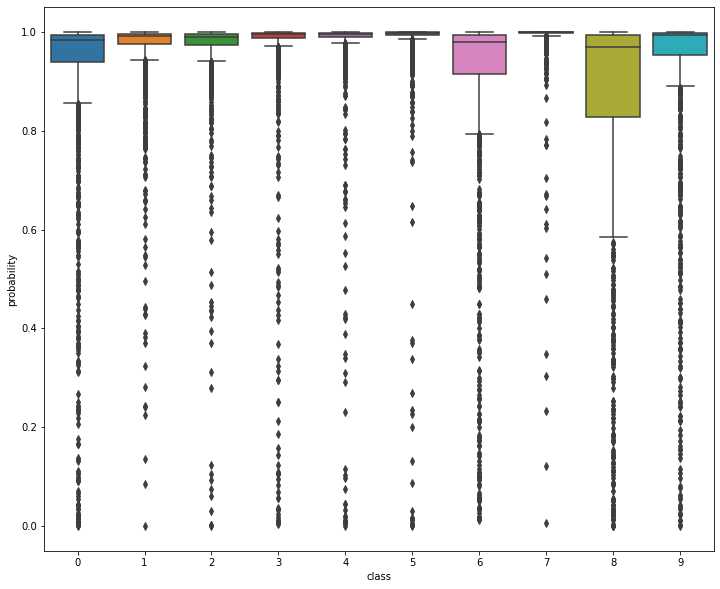

In [33]:
prob_df = get_probability_df(cb_test_preds, test_y)

plt.figure(figsize=(12, 10))
sns.boxplot(x="class", y="probability", data=prob_df)

In [0]:
cb_model.save_model('checkpoints/cb_model')

## Make Submission

In [0]:
sub_X = pd.read_pickle(DATA_DIR + 'submission_df.pkl.zip')
norm_sub_X = normalize_df(sub_X.drop(columns=['filepath']))
target_images = sub_X['filepath'].apply(lambda x: x.split('/')[-1])

In [0]:
submission_dataset = Pool(norm_sub_X)
preds = cb_model.predict_proba(submission_dataset)

In [40]:
prediction_df = pd.DataFrame(preds, columns=[f"c{i}" for i in range(10)])
prediction_df.insert(0, 'img', target_images)
prediction_df.to_csv('cb_model_submission.csv', header=True, index=False)
print(prediction_df.shape)
prediction_df.head()

(79726, 11)


,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96666.jpg,0.061153,6.573677e-01,0.006191,3.232176e-03,1.890334e-03,0.004689,0.088638,0.000744,0.135656,0.040439
1,img_97247.jpg,0.000065,9.952975e-01,0.000878,3.596040e-06,1.225221e-05,0.000001,0.002774,0.000148,0.000484,0.000335
2,img_7618.jpg,0.000018,3.915277e-07,0.000015,1.034329e-07,9.987690e-07,0.999035,0.000005,0.000061,0.000857,0.000009
3,img_48501.jpg,0.032758,8.762558e-01,0.001371,8.563173e-05,8.792564e-05,0.000270,0.003019,0.000967,0.004402,0.080785
4,img_94056.jpg,0.000198,2.114807e-04,0.975489,1.550169e-05,3.967553e-05,0.000054,0.002313,0.000239,0.021043,0.000397


# Feature engineering - VGG19_BN

## Create dataset

In [0]:
from dataset.dataset import StateFarmDataset
from dataset.load_statefarm import get_statefarm_dataloader

trainloader = get_statefarm_dataloader(train_df)
valloader = get_statefarm_dataloader(val_df)

## Define the model

In [49]:
net = vgg19_bn(pretrained=True)
net.classifier[6] = nn.Linear(4096, 10)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

### Train

In [0]:
optimizer = optim.Adagrad(net.parameters(), lr=1e-3, weight_decay=1e-4)

In [51]:
verbosity_level = 300
train_loss = 0.0
num_epochs = 3
start = 1

for epoch in range(start, num_epochs+start):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = F.softmax(net(inputs), dim=1)
        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % verbosity_level == verbosity_level-1: # print every  mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch, i + 1, running_loss / i))

    train_loss = running_loss / i
    print(f"[{epoch}/{num_epochs}] TRAIN LOSS: {train_loss:.3f}")
    with torch.no_grad():
        val_loss = 0.0
        for i, data in enumerate(valloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            outputs = F.softmax(net(inputs), dim=1)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
        print(f"[{epoch}/{num_epochs}] VAL LOSS: {val_loss / i:.3f}")

print('Finished Training')

[1/3] TRAIN LOSS: 0.955
[1/3] VAL LOSS: 0.195
[2/3] TRAIN LOSS: 0.115
[2/3] VAL LOSS: 0.090
[3/3] TRAIN LOSS: 0.057
[3/3] VAL LOSS: 0.062
Finished Training


### Test

In [0]:
torch.save(net, 'checkpoints/best_vgg.pth')

Removing transformation RandomRotation(degrees=(-20, 20), resample=False, expand=False)



tensor(0.0589)


[Text(0, 0.5, 'safe driving'),
 Text(0, 1.5, 'texting - right'),
 Text(0, 2.5, 'talking on the phone - right'),
 Text(0, 3.5, 'texting - left'),
 Text(0, 4.5, 'talking on the phone - left'),
 Text(0, 5.5, 'operating the radio'),
 Text(0, 6.5, 'drinking'),
 Text(0, 7.5, 'reaching behind'),
 Text(0, 8.5, 'hair and makeup'),
 Text(0, 9.5, 'talking to passenger')]

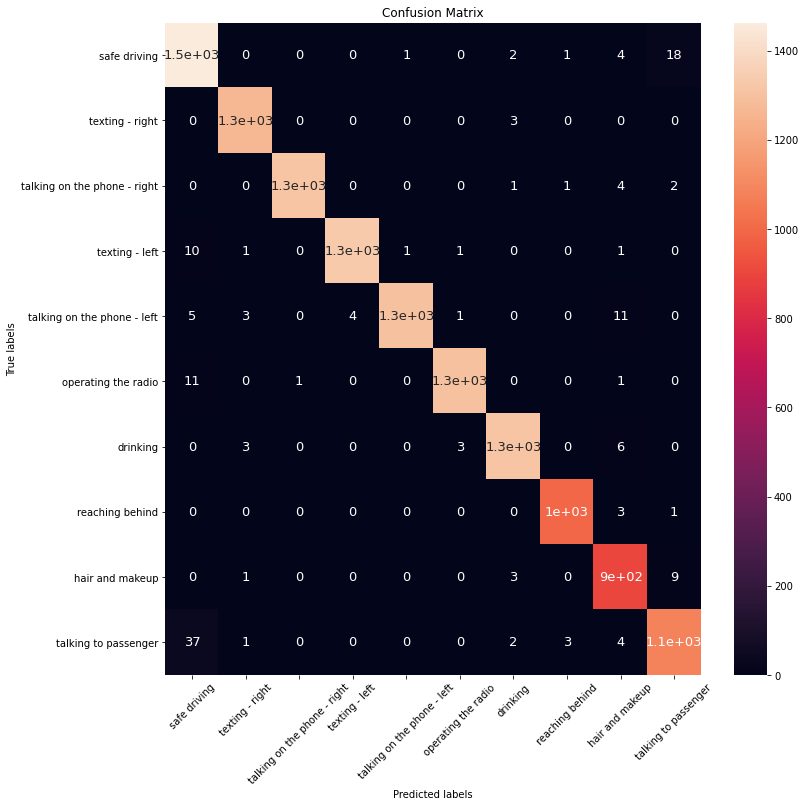

In [53]:
testloader = get_statefarm_dataloader(test_df, rotate=False)

y_pred = []
y_prob = torch.Tensor()
y_true = []
with torch.no_grad():
    for i, data in tqdm(enumerate(testloader, 0)):
        inputs = data[0].to(device)
    
        outputs = F.softmax(net(inputs), dim=1)
        _, idx = outputs.max(axis=1)
        y_prob = torch.cat([y_prob, outputs.cpu()], 0)
        y_pred += list(idx.cpu().numpy())
        y_true += list(data[1].numpy())

print(multi_class_log_loss(y_prob, torch.Tensor(y_true).long() ).detach())
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,12))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, annot_kws={"size":13}); #annot=True to annotate cells

# labels, title and ticks
label_names = list(CLASSES.values())
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label_names, rotation=45)
ax.yaxis.set_ticklabels(label_names, rotation=0)

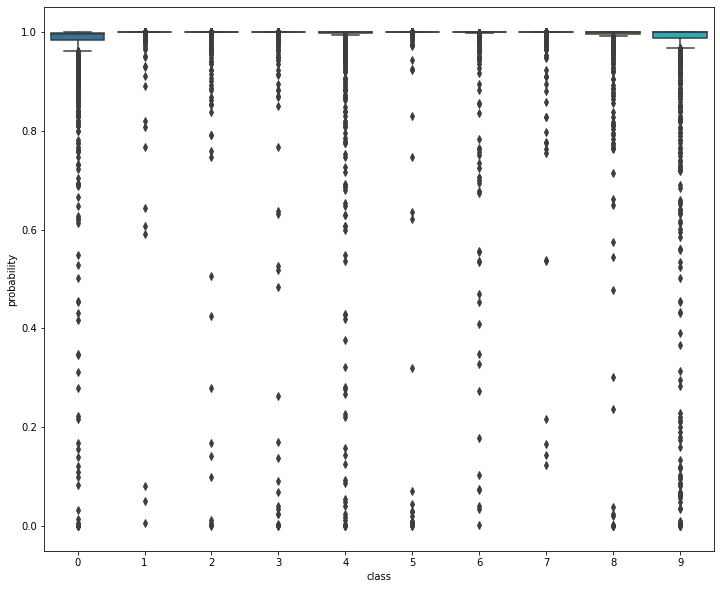

In [54]:
prob_df = get_probability_df(y_prob, y_true)

plt.figure(figsize=(12, 10))
sns.boxplot(x="class", y="probability", data=prob_df)

## Submision

In [65]:
sub_df = pd.DataFrame(
    [(os.path.join(TEST_DIR, file), file) for file in test_files], columns=['filepath', 'label']
)

subloader = get_statefarm_dataloader(sub_df, rotate=False)

Removing transformation RandomRotation(degrees=(-20, 20), resample=False, expand=False)


In [66]:
target_images = []
predictions = torch.Tensor()
with torch.no_grad():
    for i, data in tqdm(enumerate(subloader, 0)):
        inputs = data[0].to(device)

        out = F.softmax(net(inputs), dim=1)
        target_images += data[1]
        predictions = torch.cat([predictions, out.cpu()], 0)

In [67]:
prediction_df = pd.DataFrame(predictions.numpy(), columns=[f"c{i}" for i in range(10)])
prediction_df.insert(0, 'img', target_images)
prediction_df.to_csv('vgg_submission.csv', header=True, index=False)
print(prediction_df.shape)
prediction_df.head()

(79726, 11)


,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_75916.jpg,1.437409e-06,8.425768e-04,8.635172e-05,1.753177e-06,3.659372e-05,2.114792e-05,9.976801e-01,1.152718e-04,1.181882e-03,3.291377e-05
1,img_99866.jpg,3.140870e-08,1.117559e-05,6.171977e-05,1.421057e-08,2.522646e-06,1.122315e-06,9.991871e-01,2.400122e-05,7.098611e-04,2.480392e-06
2,img_73532.jpg,3.591233e-07,4.657828e-11,1.503009e-10,2.693534e-11,9.775030e-10,9.999996e-01,6.457454e-09,4.611962e-12,9.375544e-09,6.570247e-10
3,img_78365.jpg,9.488132e-06,3.015457e-07,1.835114e-09,9.999580e-01,3.126654e-05,8.327389e-09,6.446046e-10,1.397845e-12,2.464090e-08,9.269086e-07
4,img_92493.jpg,5.798705e-07,9.999878e-01,2.060386e-07,4.911910e-07,1.332749e-07,1.713564e-08,1.352723e-06,1.753470e-07,8.924794e-06,2.228435e-07


# Combine Models

In [0]:
def construct_cb_final_df(catboost_model, norm_df, orig_df, columns=['filepath', 'label']):
    cb_preds = catboost_model.predict_proba(norm_df)
    final_df = pd.DataFrame(cb_preds, columns=[f'cb_pred_class_{i}' for i in range(10)])
    final_df[columns] = orig_df[columns]
    return final_df

def construct_vgg_final_df(vgg_model, dataloader):
    with torch.no_grad():
        vgg_preds = np.empty((0,10), np.float)
        filepaths = ()
        for i, data in tqdm(enumerate(dataloader, 0), total=len(dataloader)):
            inputs = data[0].to(device)
            filepaths += data[2]
            outputs = F.softmax(vgg_model(inputs), dim=1)
            vgg_preds = np.vstack((vgg_preds, outputs.cpu().numpy()))
    final_df =pd.DataFrame(vgg_preds, columns=[f'vgg_pred_class_{i}' for i in range(10)])
    final_df['filepath'] = filepaths
    return final_df

In [58]:
final_cb_val_df = construct_cb_final_df(cb_model, norm_val_X, val_X)
final_cb_test_df = construct_cb_final_df(cb_model, norm_test_X, test_X)

final_vgg_val_df = construct_vgg_final_df(net, valloader)
final_vgg_test_df = construct_vgg_final_df(net, testloader)

final_val_df = pd.merge(final_cb_val_df, final_vgg_val_df, on='filepath')
final_test_df = pd.merge(final_cb_test_df, final_vgg_test_df, on='filepath')

In [59]:
final_val_df.head()

,cb_pred_class_0,cb_pred_class_1,cb_pred_class_2,cb_pred_class_3,cb_pred_class_4,cb_pred_class_5,cb_pred_class_6,cb_pred_class_7,cb_pred_class_8,cb_pred_class_9,filepath,label,vgg_pred_class_0,vgg_pred_class_1,vgg_pred_class_2,vgg_pred_class_3,vgg_pred_class_4,vgg_pred_class_5,vgg_pred_class_6,vgg_pred_class_7,vgg_pred_class_8,vgg_pred_class_9
0,0.000227,0.000533,7.895631e-02,3.160986e-06,0.000109,0.000113,0.116717,9.483172e-05,0.803181,0.000066,data/imgs/train/c6/img_95963.jpg,6,1.541344e-07,4.381687e-06,7.710292e-04,6.280898e-09,6.705835e-07,4.991404e-06,9.285207e-01,3.979929e-05,7.065520e-02,3.060977e-06
1,0.000014,0.000010,6.016163e-05,5.615813e-07,0.000017,0.998363,0.000272,4.708706e-04,0.000747,0.000045,data/imgs/train/c5/img_99541.jpg,5,6.235901e-09,9.573566e-12,1.284972e-09,3.008437e-12,2.104309e-09,9.999996e-01,1.847746e-09,2.285167e-10,2.868680e-07,4.453600e-08
2,0.002681,0.000267,7.024555e-06,2.974817e-05,0.000027,0.000135,0.000081,2.218044e-05,0.000053,0.996696,data/imgs/train/c9/img_55242.jpg,9,2.883671e-05,3.855947e-06,1.050083e-07,9.037274e-08,2.470043e-06,4.995404e-06,4.561745e-07,1.124253e-04,2.123125e-05,9.998255e-01
3,0.001087,0.995439,2.113849e-05,1.440757e-05,0.000014,0.000085,0.001309,5.750568e-04,0.000580,0.000875,data/imgs/train/c1/img_9974.jpg,1,1.956497e-07,9.999918e-01,5.270143e-07,1.494498e-07,6.758854e-08,3.859565e-08,5.268638e-06,4.479589e-07,1.246809e-06,4.006439e-07
4,0.000197,0.000009,1.893270e-07,9.996450e-01,0.000076,0.000004,0.000004,5.908744e-07,0.000012,0.000052,data/imgs/train/c3/img_52682.jpg,3,2.148221e-09,3.674234e-10,6.968490e-15,1.000000e+00,1.599486e-08,1.195946e-12,4.054839e-13,7.362263e-17,3.825794e-12,1.974692e-11


In [0]:
final_model_cv = CatBoostClassifier(iterations=1000,
                           loss_function='MultiClass',
                           #custom_metric=['AUC'],
                           #eval_metric='AUC',
                           random_strength=2,
                           border_count=254,
                           task_type="GPU",
                           devices='0:1')

grid = {'learning_rate': [0.05, 0.1, 0.2],
        'depth': [4, 6, 10],
        'min_data_in_leaf': [3, 5, 10],
        'l2_leaf_reg': [1, 3, 5]}

grid_search_X = final_val_df.drop(columns=['filepath', 'label'])
grid_search_y = final_val_df.label.to_list()

final_grid_search_result = final_model_cv.grid_search(grid, 
                                       X=grid_search_X, 
                                       y=grid_search_y, 
                                       cv=3,
                                       refit=True)

In [0]:
final_grid_search_result['params']

In [60]:
final_model_cv = CatBoostClassifier(iterations=1000,
                           loss_function='MultiClass',
                           learning_rate=0.01,
                           depth=6,
                           l2_leaf_reg=3,
                           min_data_in_leaf=5,
                           #custom_metric=['AUC'],
                           #eval_metric='AUC',
                           random_strength=2,
                           border_count=254,
                           task_type="GPU",
                           devices='0:1')

grid_search_X = final_val_df.drop(columns=['filepath', 'label'])
grid_search_y = final_val_df.label.to_list()

final_model_cv.fit( 
    X=grid_search_X, 
    y=grid_search_y, 
)

0:	learn: 2.2488600	total: 15.2ms	remaining: 15.2s
1:	learn: 2.1974324	total: 28.7ms	remaining: 14.3s
2:	learn: 2.1488170	total: 41.5ms	remaining: 13.8s
3:	learn: 2.1026004	total: 54.9ms	remaining: 13.7s
4:	learn: 2.0573283	total: 67.9ms	remaining: 13.5s
5:	learn: 2.0160969	total: 80.2ms	remaining: 13.3s
6:	learn: 1.9753604	total: 93.9ms	remaining: 13.3s
7:	learn: 1.9356937	total: 106ms	remaining: 13.1s
8:	learn: 1.8989045	total: 117ms	remaining: 12.9s
9:	learn: 1.8630742	total: 129ms	remaining: 12.7s
10:	learn: 1.8289598	total: 139ms	remaining: 12.5s
11:	learn: 1.7958691	total: 151ms	remaining: 12.4s
12:	learn: 1.7635902	total: 162ms	remaining: 12.3s
13:	learn: 1.7327240	total: 173ms	remaining: 12.2s
14:	learn: 1.7026396	total: 184ms	remaining: 12.1s
15:	learn: 1.6731242	total: 196ms	remaining: 12.1s
16:	learn: 1.6449709	total: 208ms	remaining: 12s
17:	learn: 1.6175660	total: 220ms	remaining: 12s
18:	learn: 1.5912235	total: 235ms	remaining: 12.2s
19:	learn: 1.5657687	total: 249ms	rema

## Test

0.04586521979199053


[Text(0, 0.5, 'safe driving'),
 Text(0, 1.5, 'texting - right'),
 Text(0, 2.5, 'talking on the phone - right'),
 Text(0, 3.5, 'texting - left'),
 Text(0, 4.5, 'talking on the phone - left'),
 Text(0, 5.5, 'operating the radio'),
 Text(0, 6.5, 'drinking'),
 Text(0, 7.5, 'reaching behind'),
 Text(0, 8.5, 'hair and makeup'),
 Text(0, 9.5, 'talking to passenger')]

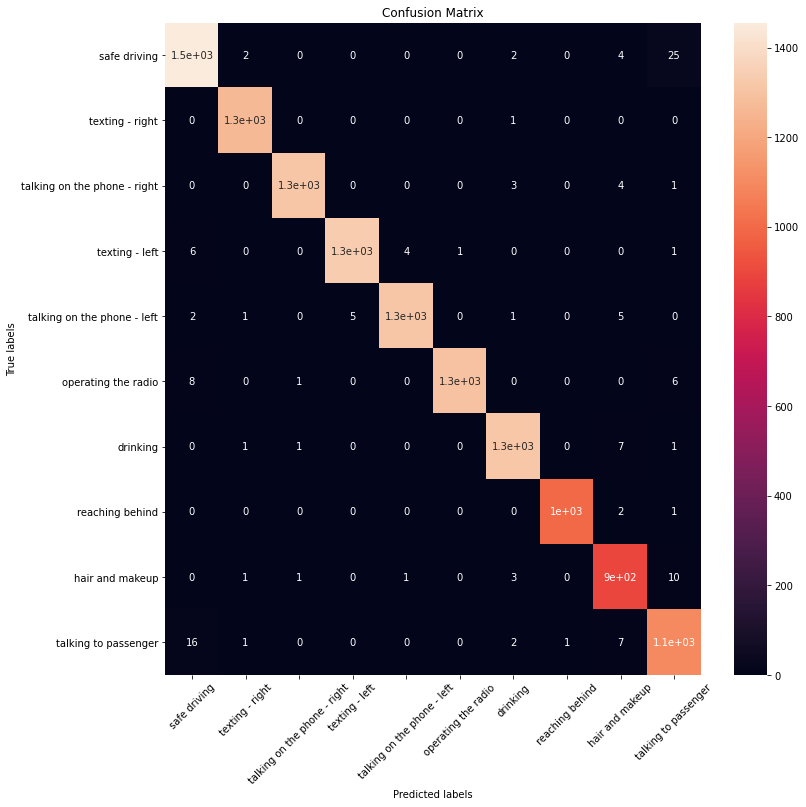

In [61]:
final_test_X = final_test_df.drop(columns=['filepath', 'label'])
final_test_y = final_test_df.label.to_list()

final_test_preds = final_model_cv.predict_proba(final_test_X)
print(log_loss(final_test_y, final_test_preds))


final_test_y_pred = np.argmax(final_test_preds,axis=1)
cm = confusion_matrix(final_test_y, final_test_y_pred)

plt.figure(figsize=(12,12))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
label_names = list(CLASSES.values())
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(label_names, rotation=45)
ax.yaxis.set_ticklabels(label_names, rotation=0)

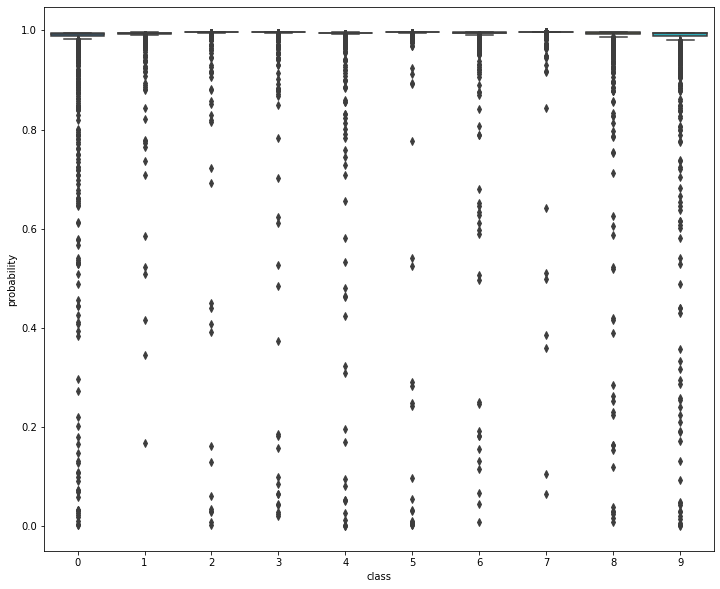

In [62]:
prob_df = get_probability_df(final_test_preds, final_test_y)

plt.figure(figsize=(12, 10))
sns.boxplot(x="class", y="probability", data=prob_df)

## Submission

In [68]:
final_cb_sub_df = construct_cb_final_df(cb_model, norm_sub_X, sub_X, columns=['filepath'])

final_vgg_sub_df = construct_vgg_final_df(net, subloader)

In [0]:
final_sub_df = pd.merge(final_cb_sub_df, final_vgg_sub_df, on='filepath')
target_images = final_sub_df['filepath'].apply(lambda x: x.split('/')[-1])

final_sub_preds = final_model_cv.predict_proba(final_sub_df.drop(columns=['filepath']))

In [0]:
prediction_df = pd.DataFrame(final_sub_preds, columns=[f"c{i}" for i in range(10)])
prediction_df.insert(0, 'img', target_images)
prediction_df.to_csv('final_submission.csv', header=True, index=False)
print(prediction_df.shape)
prediction_df.head()

(79726, 11)


,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_96666.jpg,0.001161,0.989446,0.000771,0.000885,0.001093,0.001148,0.001575,0.000754,0.002051,0.001116
1,img_97247.jpg,0.000161,0.998125,0.000223,0.000181,0.000171,0.000269,0.000384,0.000169,0.000146,0.000169
2,img_7618.jpg,0.000183,0.000243,0.000190,0.000312,0.000274,0.998217,0.000154,0.000173,0.000140,0.000113
3,img_48501.jpg,0.001207,0.993295,0.000675,0.000643,0.000514,0.000936,0.001133,0.000477,0.000538,0.000581
4,img_94056.jpg,0.000168,0.000156,0.998008,0.000114,0.000229,0.000354,0.000390,0.000216,0.000240,0.000125
